<a href="https://colab.research.google.com/github/till-tietz/parsel/blob/master/1990_election_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For some reason the R interface for tesseract was being uncooperative so I had to implement the ocr script in python. 

#Dependency Setup 

The first four code blocks deal with dependency installation in the virtual environment.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install imageio
!pip install re
!pip install opencv2
!pip install path
!pip install cv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement opencv2 (from versions: none)
ERROR: No matching distribution found for opencv2


In [ ]:
import matplotlib.pyplot as plt
import pytesseract 
import imageio
import re
import cv
from pathlib import Path
from pytesseract import Output

ERROR:root:Error disabling cv.imshow().
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_import_hooks/_cv2.py", line 86, in load_module
    cv_module.imshow,
AttributeError: module 'cv' has no attribute 'imshow'


In order to make tesseract available in this environment you'll have to copy the output of **!which tesseract** into the section in quotations of the next code block 

In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

#OCR Test 

This is a test/proof of concept for the OCR method. 
General idea: 
Tesseract creates bounding boxes around the text elements it identifies. Ideally we can thus do the following: 
1. find the column header for the left party (PDS-LL)
2. extract and buffer its bounding box 
3. return all text elements with x bound > min(header x bound) & x bound < max(header x bound) 

In [ ]:
#load an image 
from google.colab import files
uploaded = files.upload()

Saving SB_B07-02-04_1990j05_BB_17.png to SB_B07-02-04_1990j05_BB_17.png


In [ ]:
#ocr image 
img = imageio.imread("SB_B07-02-04_1990j05_BB_17.png")
d = pytesseract.image_to_data(img, output_type=Output.DICT) 
keys = list(d.keys())

In [ ]:
from google.colab.patches import cv2_imshow

Let's have a look at what we're identifying here. 

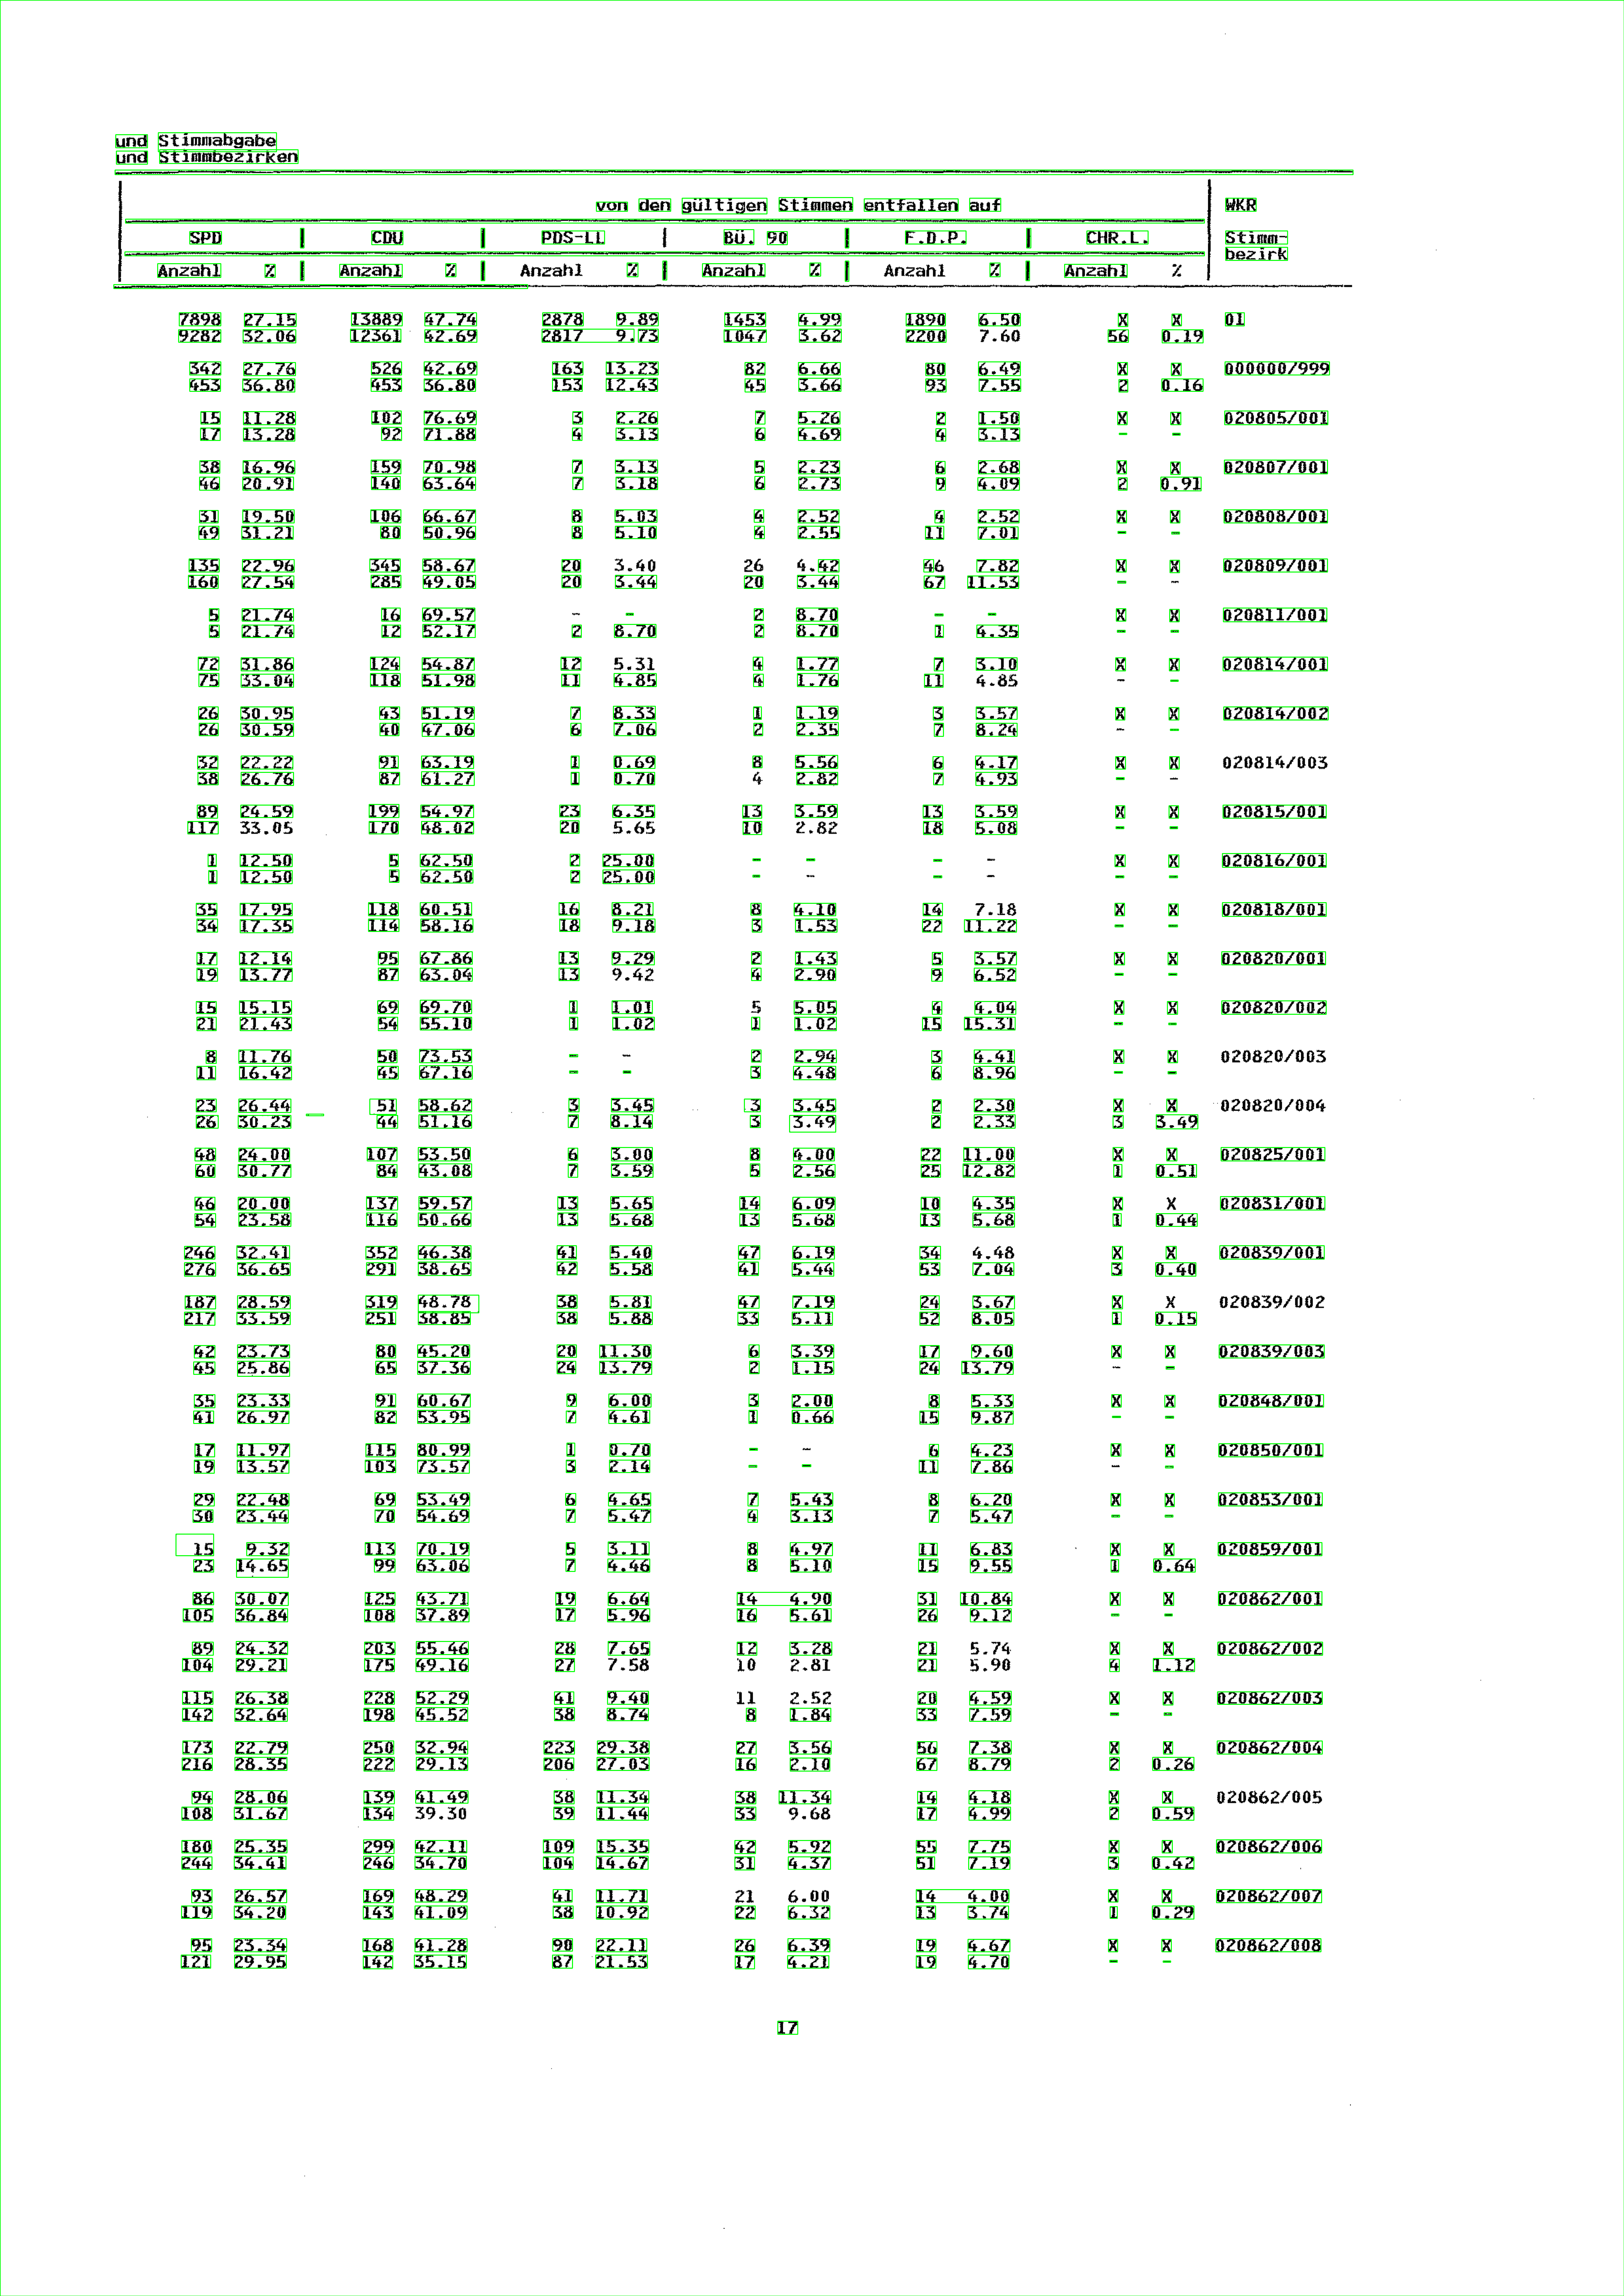

-1

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 30:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

With almost no pre-processing we're alreading doing quite well. 
Two immediate fixes for improvement come to mind:
1. experiment with the **if float(d['conf'][i]) > 30:** condition (it essentially controls how strict we are on filtering by ocr identification confidence) 
2. normalize grey scale on the images 

Let's test if we can return the left party header bounding 

In [ ]:
left_party_pattern = "PDS-LL"

for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
    	if re.match(left_party_pattern, d['text'][i]):
	        #define bounding box array with x,y,w,h
          box_dim = [d['left'][i], d['top'][i], d['width'][i], d['height'][i]]
	        
box_dim

[1655, 705, 191, 40]